In [ ]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
# Define the function to load data
def load_data(file_path):
    """Loads CSV file into a DataFrame."""
    return pd.read_csv(file_path)

# Function to filter high-severity vulnerabilities
def filter_high_severity(df):
    """Filters only the high-severity vulnerabilities from the dataset."""
    return df[['commit', 'high_sev']]


# Function to track introduction and fixing of vulnerabilities
def compute_vulnerability_trends(df):
    """Computes the introduction and fixing trends of high-severity vulnerabilities."""
    df = df.copy()
    df['change'] = df['high_sev'].diff().fillna(0)  # Compute the difference between consecutive commits
    df['status'] = df['change'].apply(lambda x: 'Introduced' if x > 0 else ('Fixed' if x < 0 else 'No Change'))
    return df

In [24]:
# Function to plot trends of high-severity vulnerabilities
def plot_vulnerability_trends(df, repo_name):
    """Plots the introduction and fixing trends of high-severity vulnerabilities."""
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['high_sev'], marker='o', linestyle='-', label='High Severity Count')

    # Highlight introduced vulnerabilities
    introduced = df[df['status'] == 'Introduced']
    plt.scatter(introduced.index, introduced['high_sev'], color='red', label='Introduced', zorder=3)

    # Highlight fixed vulnerabilities
    fixed = df[df['status'] == 'Fixed']
    plt.scatter(fixed.index, fixed['high_sev'], color='green', label='Fixed', zorder=3)

    plt.xlabel('Commit Index')
    plt.ylabel('High Severity Vulnerabilities')
    plt.title(f'High-Severity Vulnerability Trends in {repo_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [25]:
# Main function to run the analysis
def analyze_repository(file_path, repo_name):
    """Executes the full analysis pipeline for a given repository."""
    df = load_data(file_path)
    df_filtered = filter_high_severity(df)
    df_trends = compute_vulnerability_trends(df_filtered)
    print(df_trends[['commit', 'high_sev', 'change', 'status']].head(10))  # Display first 10 rows
    plot_vulnerability_trends(df_trends, repo_name)

# Run analysis for the given repositories
repo_files = {
    "ArchieveBox": "individual_repository_level_analysis/ArchieveBox_bandit_summary.csv",
    "Hosts": "individual_repository_level_analysis/hosts_bandit_summary.csv",
    "Pwntools": "individual_repository_level_analysis/pwntools_bandit_summary.csv"
}


🔹 Analyzing ArchieveBox...

                                     commit  high_sev  change      status
0  0347b911aaed725e248384a44ec54706c7556541        97     0.0   No Change
1  098573705b812b45feb0c830ffa8fb53079af271        99     2.0  Introduced
2  0ad1bdaf93fa5c177af85f6afe7c4bc945f106c6        99     0.0   No Change
3  0db6437c4e1ec3d2dfffcdf7d0691336a7c59129        97    -2.0       Fixed
4  0f536ff18badbcb453b7ebf6a2150dea9b143dc4        97     0.0   No Change
5  0f860d40f1a36448e33a98fc439f0ff0836c03a9        97     0.0   No Change
6  12f109b1be9577f5d7adde0a93021496e2d60624        99     2.0  Introduced
7  1444cf7fdaadf81c76a386245ae1e37cad3e3d6d        98    -1.0       Fixed
8  1ceaa1ac7a492f946e67195d2efdb8477a0ff5a9        97    -1.0       Fixed
9  1e7b1dff838a7772b971b06f4ea51bf40b9d0b92        99     2.0  Introduced


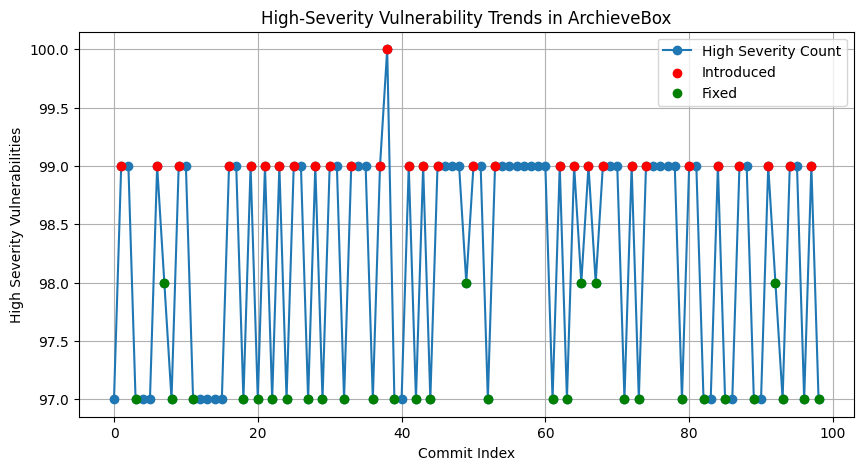


🔹 Analyzing Hosts...

                                     commit  high_sev  change     status
0  04e625de9df0cce5264767c0e8524b5dcaaaf02c        22     0.0  No Change
1  06f39f4c4708fc8331f931ba088dd3b6c4aa3c51        22     0.0  No Change
2  080d276bb71cc68777ae583f3a61e06af72e9f39        22     0.0  No Change
3  0eac5602fff874e5298b08f41f394934773ce6f8        22     0.0  No Change
4  0ecb892f6f665d5d073114e605bc09bc4ae9bb76        22     0.0  No Change
5  129d3e2667e3bad66c1ba1f79374afbf5b7eb0a5        22     0.0  No Change
6  13d30e806205c6b7ba110577ebdc16640f9a41aa        22     0.0  No Change
7  1b19054c880e1ea75c73dfbeb3fb071c2bf08e1f        22     0.0  No Change
8  1d01b082d6b6395310536799cbdd387a0e2aebe7        22     0.0  No Change
9  1f2c2afc3caecd9920f57e66d2699c9af9ffe0b4        22     0.0  No Change


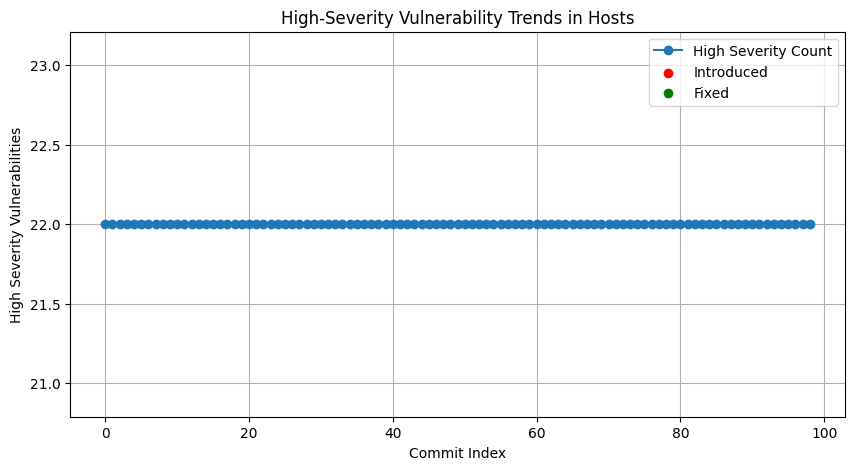


🔹 Analyzing Pwntools...

                                     commit  high_sev  change     status
0  00663aa1bf3050a4f8ee4c610be009d1a5352963        44     0.0  No Change
1  0a46c27afa98a7a760978e646d9cd7ec9274647d        44     0.0  No Change
2  101f9bc76b92aebe765d8d49a46f2ec89e904ae9        44     0.0  No Change
3  149ebe0c474694266b66add69da30a3642f2794f        44     0.0  No Change
4  18c8bfba3d4e6a8232a8bd96be3188dfc94063ae        44     0.0  No Change
5  241b1395c602bd2a8fa06bf868615a6b2e110f16        44     0.0  No Change
6  248f4510c64051a4245bae1d0bc336441f0d6006        44     0.0  No Change
7  24d217cfbdc9efc0ac0c29d1ce792b3b87603a07        44     0.0  No Change
8  26e72f2b3efc4aa589e741fcae3bc525e64d18ae        44     0.0  No Change
9  2ce27dab0d570c252385bb80c7bd4a9a90fa5f2e        44     0.0  No Change


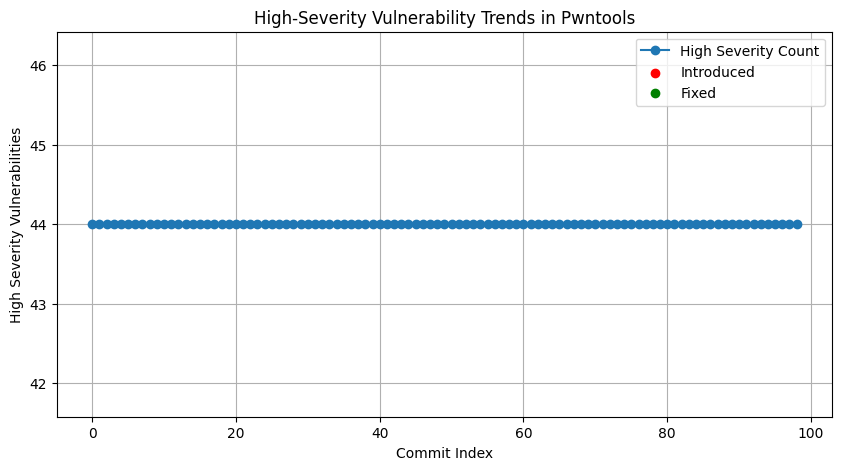

In [26]:
for repo_name, file_path in repo_files.items():
    print(f"\n🔹 Analyzing {repo_name}...\n")
    analyze_repository(file_path, repo_name)